Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.shape

(200000, 9)

In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


1. Pre-process the dataset.


In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [10]:
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['pickup_day']=df['pickup_datetime'].dt.dayofweek

In [11]:
df['pickup_hour']

0         19
1         20
2         21
3          8
4         17
          ..
199995    10
199996     1
199997     0
199998    14
199999     4
Name: pickup_hour, Length: 200000, dtype: int32

In [12]:
df['pickup_day']

0         3
1         4
2         0
3         4
4         3
         ..
199995    6
199996    4
199997    0
199998    2
199999    5
Name: pickup_day, Length: 200000, dtype: int32

2. Identify outliers.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

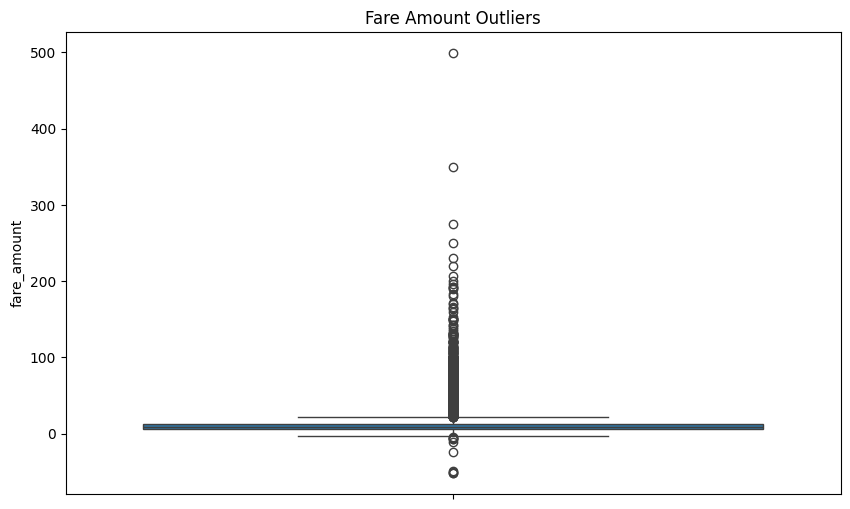

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df['fare_amount'])
plt.title('Fare Amount Outliers')
plt.show()

Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['fare_amount']>= (Q1-1.5*IQR)) & (df['fare_amount']<= (Q3+1.5*IQR)) ]

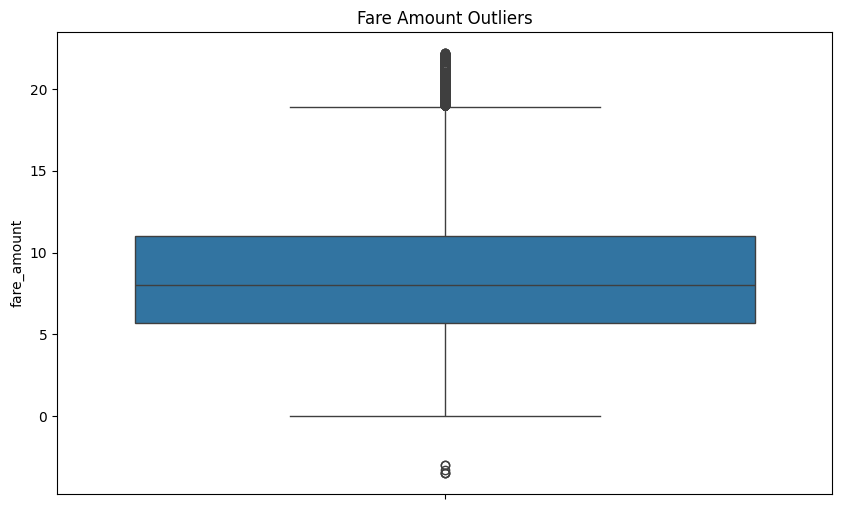

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(df['fare_amount'])
plt.title('Fare Amount Outliers')
plt.show()


3. Check the correlation.

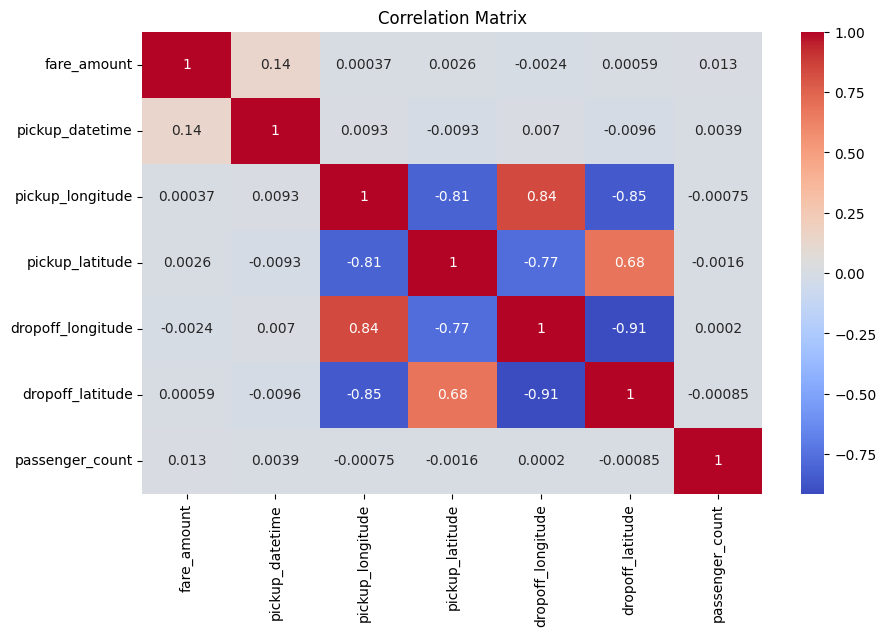

In [16]:
correlation_matrix=df[[ 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']].corr()
plt.figure(figsize=(10,6))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from geopy.distance import geodesic 


df=df[(df['pickup_latitude'].between(-90,90)) &
      (df['pickup_longitude'].between(-180,180)) &
      (df['dropoff_latitude'].between(-90,90)) &
      (df['dropoff_longitude'].between(-90,90)) 
]

df['distance']=df.apply(
    lambda row: geodesic(
        (row['pickup_latitude'],row['pickup_longitude']),
        (row['dropoff_latitude'],row['dropoff_longitude'])).km,axis=1
    
)

x= df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count','distance']]
y=df['fare_amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)




In [18]:

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

In [19]:

rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_lr=lr_model.predict(x_test)
y_pred_rf=rf_model.predict(x_test)

r2_lr=r2_score(y_test,y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))

r2_rf=r2_score(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))

print("Linear Regression : R2 Score -> ",r2_lr," and RMSE -> ",rmse_lr)
print("Random Forest Regression : R2 Score -> ",r2_rf," and RMSE -> ",rmse_rf)


Linear Regression : R2 Score ->  -1.528993643851173e-05  and RMSE ->  4.144029930695001
Random Forest Regression : R2 Score ->  0.7054573171295233  and RMSE ->  2.2490218900265098
